### ETL

importando as bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('despesasPorOrgao.csv', 
                    sep=';', # nforma que o separador de colunas no arquivo é ; (ponto e vírgula), e não a vírgula padrão ,.
                    engine='python') #Pede para o Pandas usar o “motor de leitura” em Python puro.

display(df.head(5))

,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 7
0,01/2024,Sem informação,-3,"967.558.209,93","310.108.904,57","46.759.824,98","97.441.651,38",NaN
1,02/2024,Sem informação,-3,"216.747.670,10","317.786.480,49","327.311.256,23","303.725,05",NaN
2,06/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"17.051.025,24","427.488.383,44","345.545.419,32","1.240.658,92",NaN
3,01/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"3.962.857.086,69","284.533.641,65","90.663.205,10","292.374.314,52",NaN
4,12/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"48.774.769,76","426.890.446,43","466.617.918,41","16.118.249,69",NaN


In [2]:
print(df.columns.tolist()) # Mostrando quais as colunas estão dentro do df
df.drop(columns=['Unnamed: 7'], inplace=True) # Excluindo a coluna['Unnamed: 7] que não retornar nenhum dado e não irei usar 
display(df.head(5)) # Mostrando o df após os a coluna ser apagada


['Mês Ano', 'Órgão Superior', 'Órgão/Entidade Vinculada', 'Valor Empenhado', 'Valor Liquidado', 'Valor Pago', 'Valor Restos a Pagar Pagos', 'Unnamed: 7']


,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos
0,01/2024,Sem informação,-3,"967.558.209,93","310.108.904,57","46.759.824,98","97.441.651,38"
1,02/2024,Sem informação,-3,"216.747.670,10","317.786.480,49","327.311.256,23","303.725,05"
2,06/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"17.051.025,24","427.488.383,44","345.545.419,32","1.240.658,92"
3,01/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"3.962.857.086,69","284.533.641,65","90.663.205,10","292.374.314,52"
4,12/2024,63000 - Advocacia-Geral da União,63000 - Advocacia-Geral da União - Unidades co...,"48.774.769,76","426.890.446,43","466.617.918,41","16.118.249,69"


In [3]:
linhas , colunas = df.shape
print(f'O DataFrame possui um total de {linhas} de linhas e um total de {colunas} de colunas')


O DataFrame possui um total de 3034 de linhas e um total de 7 de colunas


Mês Ano
01/2024    250
02/2024    248
03/2024    251
04/2024    253
05/2024    249
06/2024    255
07/2024    256
08/2024    252
09/2024    253
10/2024    255
11/2024    252
12/2024    260
Name: count, dtype: int64


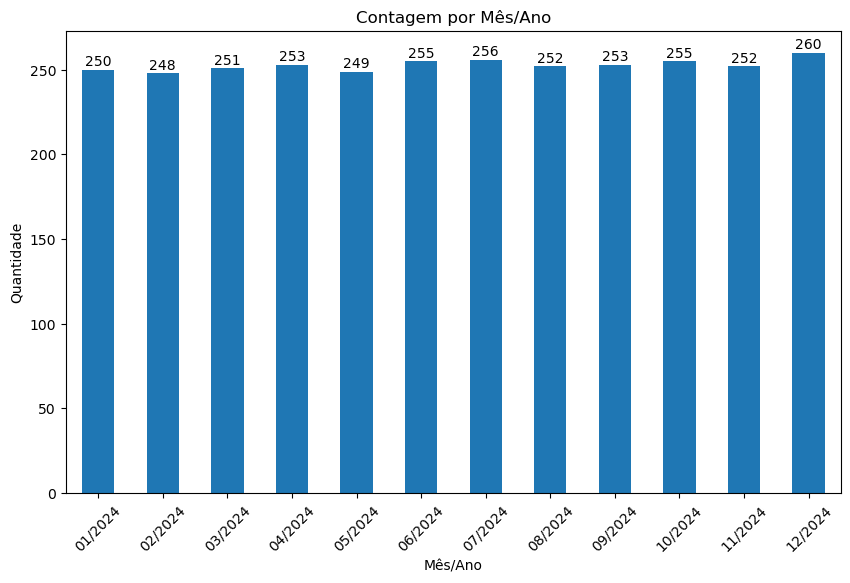

In [5]:
contagem_meses_anos = df['Mês Ano'].value_counts().sort_index()  # já ordenado
print(contagem_meses_anos)

plt.figure(figsize=(10,6))
ax = contagem_meses_anos.plot(kind='bar')
plt.title('Contagem por Mês/Ano')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Adicionar rótulos em cada barra
for i, v in enumerate(contagem_meses_anos.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')  # v+0.5 para não sobrepor a barra

plt.show()

Órgão Superior
26000 - Ministério da Educação                                           1404
53000 - Ministério da Integração e do Desenvolvimento Regional            144
52000 - Ministério da Defesa                                              120
42000 - Ministério da Cultura                                             108
30000 - Ministério da Justiça e Segurança Pública                         108
32000 - Ministério de Minas e Energia                                      84
25000 - Ministério da Fazenda                                              80
24000 - Ministério da Ciência, Tecnologia e Inovação                       77
44000 - Ministério do Meio Ambiente e Mudança do Clima                     75
36000 - Ministério da Saúde                                                72
68000 - Ministério de Portos e Aeroportos                                  60
39000 - Ministério dos Transportes                                         51
28000 - Ministério do Desenvolvimento, Indústria,

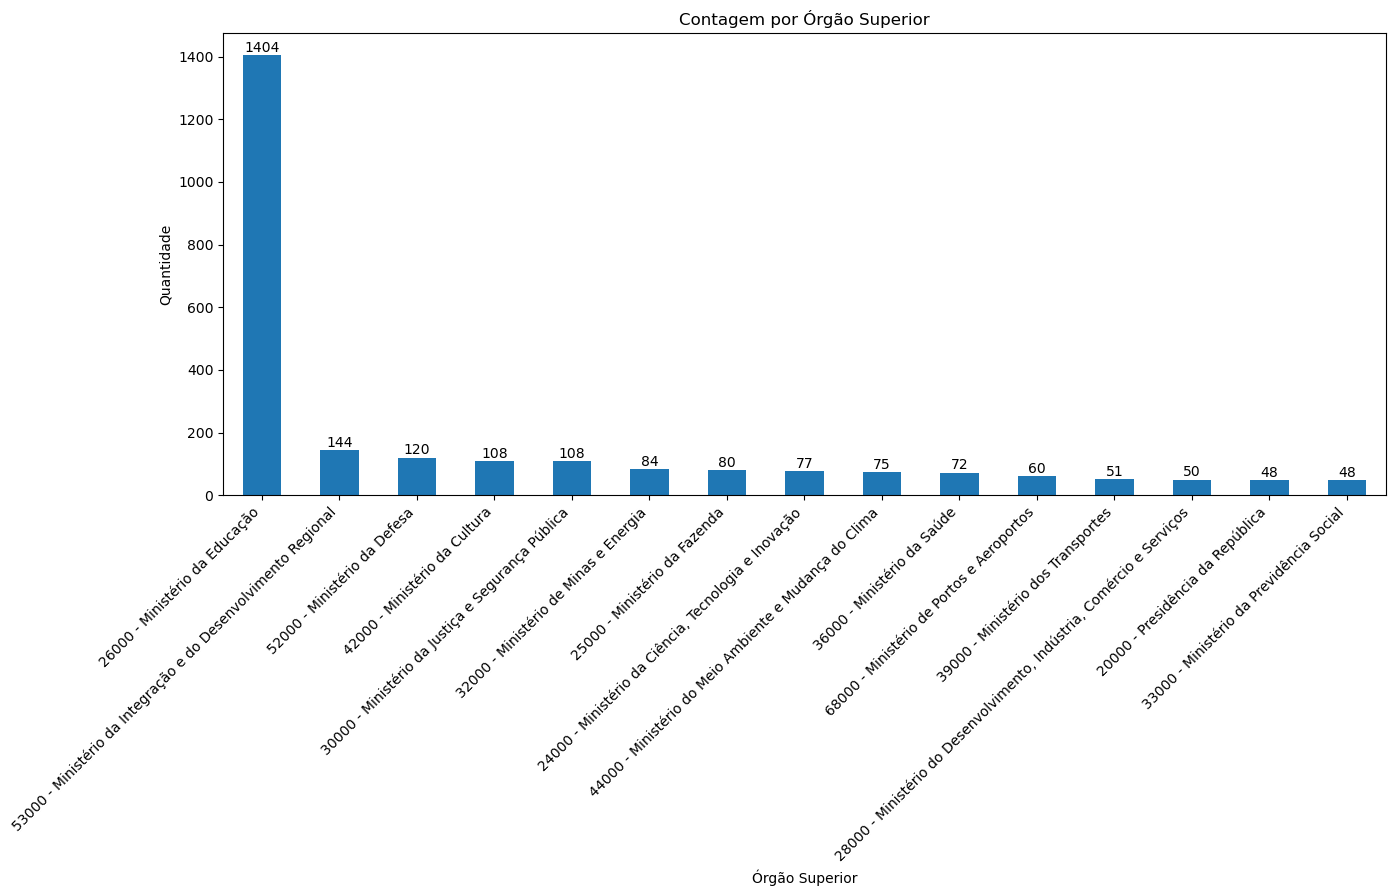

In [20]:
# Pegar os 15 orgãos superiores mais frequentes
contagem_orgao_superior = df['Órgão Superior'].value_counts().head(15)
print(contagem_orgao_superior)



plt.figure(figsize=(15,6))
ax = contagem_orgao_superior.plot(kind='bar')

plt.title('Contagem por Órgão Superior')
plt.xlabel('Órgão Superior')  # título do eixo X
plt.ylabel('Quantidade')

# Colocar rótulos corretos e rotacionar
ax.set_xticklabels(contagem_orgao_superior.index, rotation=45, ha='right')  # ha='right' melhora alinhamento

# Adicionar rótulos em cada barra
for i, v in enumerate(contagem_orgao_superior.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()


Órgão/Entidade Vinculada
26429 - Instituto Federal de Educação, Ciência e Tecnologia de Goiás                             12
22201 - Instituto Nacional de Colonização e Reforma Agrária                                      12
30203 - Instituto Nacional de Metrologia, Qualidade e Tecnologia                                 12
24208 - Instituto Nacional de Tecnologia da Informação                                           12
37202 - Instituto Nacional do Seguro Social                                                      12
22000 - Ministério da Agricultura e Pecuária - Unidades com vínculo direto                       12
24000 - Ministério da Ciência, Tecnologia e Inovação - Unidades com vínculo direto               12
42000 - Ministério da Cultura - Unidades com vínculo direto                                      12
52000 - Ministério da Defesa - Unidades com vínculo direto                                       12
26000 - Ministério da Educação - Unidades com vínculo direto               

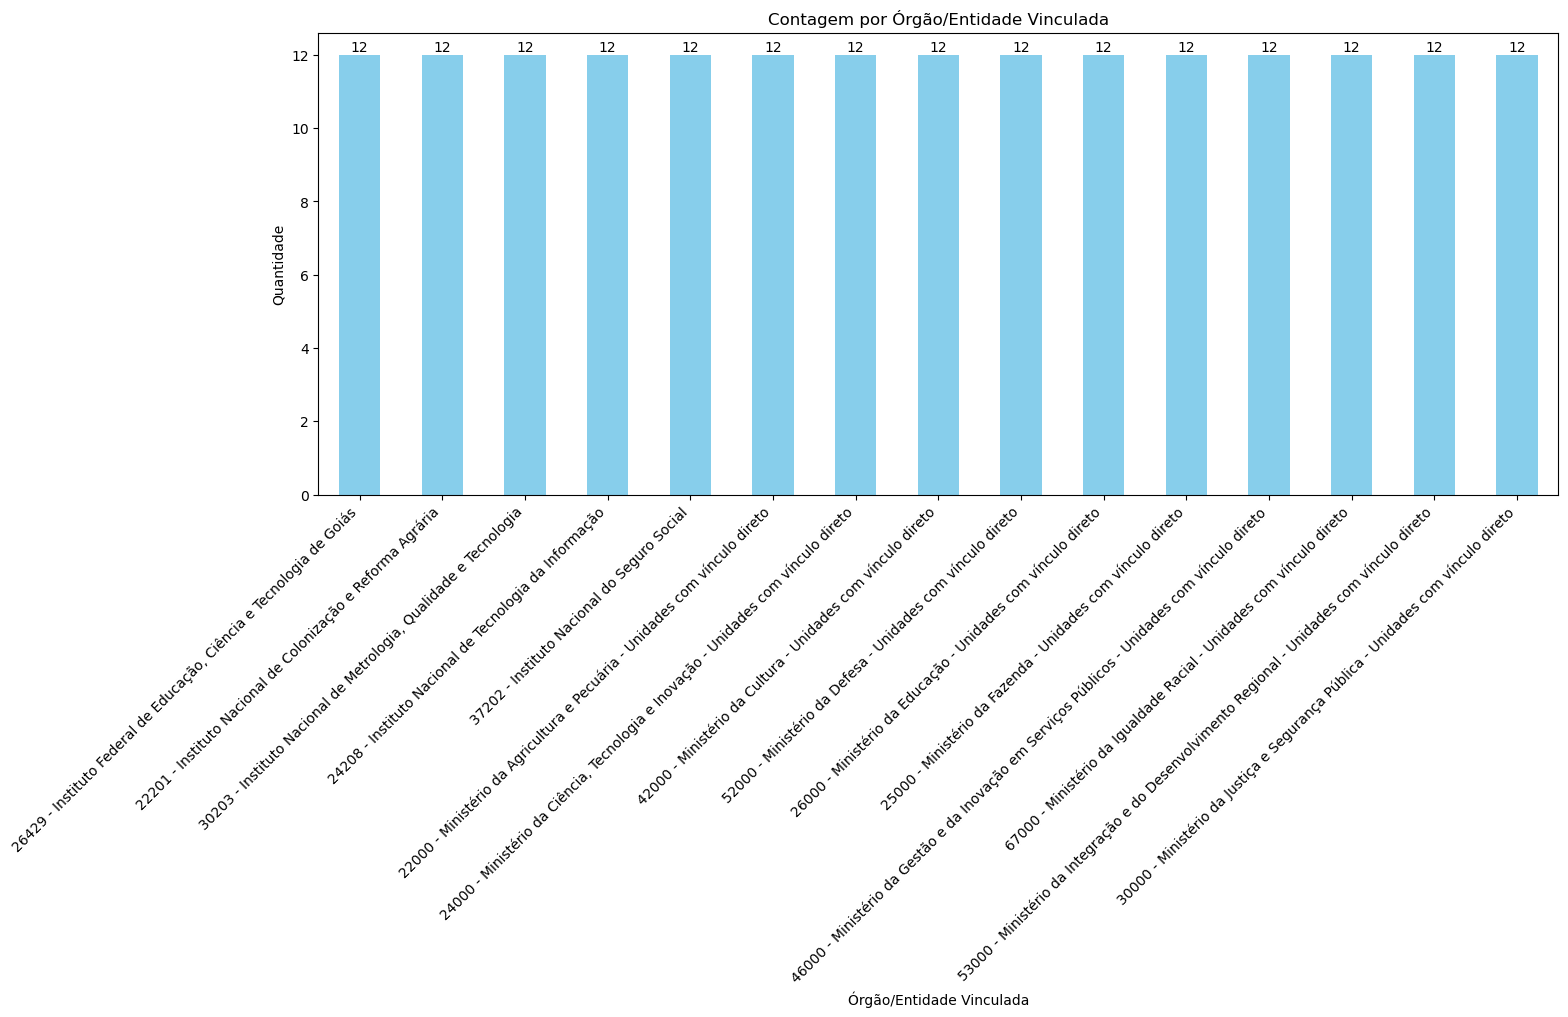

: 

In [ ]:
contagem_orgao_entidade = df['Órgão/Entidade Vinculada'].value_counts().head(15)
print(contagem_orgao_entidade)

#contagem_maior_10 = contagem_orgao_entidade[contagem_orgao_entidade >= 10]
#print(contagem_maior_10.count())

plt.figure(figsize=(16,6))
ax = contagem_orgao_entidade.plot(kind='bar', color='skyblue')

plt.title('Contagem por Órgão/Entidade Vinculada')
plt.xlabel('Órgão/Entidade Vinculada')
plt.ylabel('Quantidade')

# Rotular corretamente
ax.set_xticklabels(contagem_orgao_entidade.index, rotation=45, ha='right')

# Adicionar rótulos no topo das barras
for i, v in enumerate(contagem_orgao_entidade.values):
    ax.text(i, v, str(v), ha='center', va='bottom')  # sem o +1, fica no topo da barra

plt.show()




